# Thompson Sampling

In [51]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

Dataset:
- There are 10 different ads (with different designs).
- *Simulates* that each row is a user session where the user can click on the ads.
- Each row is equivalent to one round.

In [52]:
dataset = pd.read_csv("./filez/Ads_CTR_Optimisation.csv")
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


### Implementing the Thompson Sampling algo

In [53]:
def thompson_sampling(rounds: int):
    N = rounds  # num of users (rounds)
    d = 10  # num of ads
    ads_selected = []  # ads selected over the rounds (10K elements in the end)
    numbers_of_rewards_1 = [0] * d
    numbers_of_rewards_0 = [0] * d
    total_reward = 0

    for n in range(0, N):
        ad = 0
        max_random = 0
        for i in range(0, d):
            random_beta = random.betavariate(
                numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1
            )
            if random_beta > max_random:
                max_random = random_beta
                ad = i
        ads_selected.append(ad)
        reward = dataset.values[n, ad]
        if reward == 1:
            numbers_of_rewards_1[ad] += 1
        else:
            numbers_of_rewards_0[ad] += 1
        total_reward += reward

    return ads_selected

### Generic function to display histograms

In [54]:
def show_histogram(ads_selected):
    # Define bin edges so that each integer value (x-axis) is at the center of a bin
    bin_edges = np.arange(min(ads_selected) - 0.5, max(ads_selected) + 1.5, 1)

    # Plot histogram and get values
    counts, _, patches = plt.hist(
        ads_selected, bins=bin_edges, align="mid", rwidth=0.8, color="#9999ff"
    )

    # Find the index of the highest bin
    max_bin_index = np.argmax(counts)

    # Highlight the highest bin in a different color
    patches[max_bin_index].set_fc("#ff9999")  # Soft red color

    # Set x-axis ticks to integer values
    plt.xticks(range(min(ads_selected), max(ads_selected) + 1))

    # Add titles and labels
    plt.title("Histogram of ads selections")
    plt.xlabel("Ads")
    plt.ylabel("Number of times each ad was selected")

    # Show plot
    plt.show()

### Visualising the results for 10,000 rounds

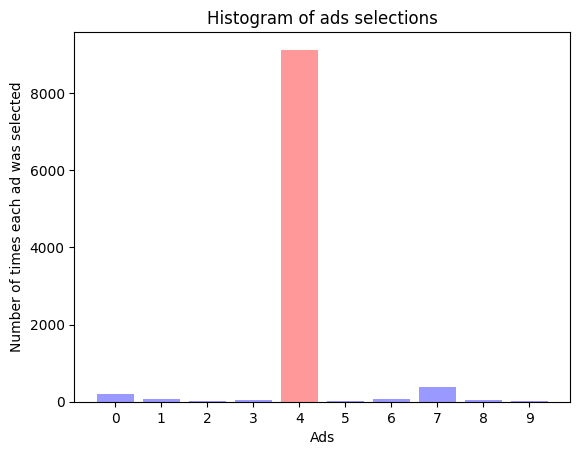

In [55]:
# Ad 4 is clear winner with 10,000 rounds
ads_selected = thompson_sampling(10000)
show_histogram(ads_selected)

### Visualising the results for 500 rounds

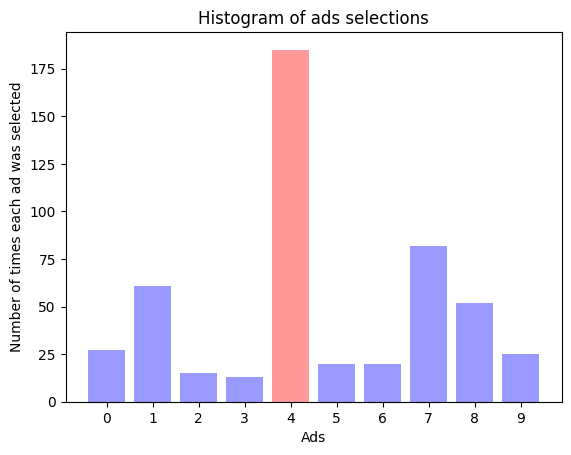

In [56]:
# Same result with 500 rounds instead of 10,000 rounds!!
ads_selected = thompson_sampling(500)
show_histogram(ads_selected)

    -> Thompson Sampling is able to find results with significantly lower number of rounds.